<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Homework: Feature Selection and Dimention Reduction. PCA </center></h2>

In [93]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gender Recognition by Voice

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

The following acoustic properties of each voice are measured and included within the CSV:

* meanfreq: mean frequency (in kHz)
* sd: standard deviation of frequency
* median: median frequency (in kHz)
* Q25: first quantile (in kHz)
* Q75: third quantile (in kHz)
* IQR: interquantile range (in kHz)
* skew: skewness (see note in specprop description)
* kurt: kurtosis (see note in specprop description)
* sp.ent: spectral entropy
* sfm: spectral flatness
* mode: mode frequency
* centroid: frequency centroid (see specprop)
* peakf: peak frequency (frequency with highest energy)
* meanfun: average of fundamental frequency measured across acoustic signal
* minfun: minimum fundamental frequency measured across acoustic signal
* maxfun: maximum fundamental frequency measured across acoustic signal
* meandom: average of dominant frequency measured across acoustic signal
* mindom: minimum of dominant frequency measured across acoustic signal
* maxdom: maximum of dominant frequency measured across acoustic signal
* dfrange: range of dominant frequency measured across acoustic signal
* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* label: male or female

In [94]:
# Read data sample
data = pd.read_csv("data/voice.csv")
print("DataFrame shape: ", data.shape)
data.head()

DataFrame shape:  (3168, 21)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Data Preparation


In [95]:
# Get feature names
feature_names = data.columns.drop(['label'])
print("Feature names: ", feature_names)

Feature names:  Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')


In [96]:
# Prepare X and y
X = data[feature_names].values
y = 1. * (data['label'].values == 'male')

## Train / Test Split + Standardization

We perform standartization to provide you possibility to use any classifier you know without any difficulties induced by feature scales. 

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardization
ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Classifier Selection

Generally, tasks below can be done with any classifier, but we ask you to provide answers with Decision Tree classifier with the following hyperparameters (don't touch this):

In [98]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Task 1 (1 point)

Find just **one** feature, that provides the best classification accuracy. What is the name of this feature? Save name in variable first_best_feature and go through assert

Hint: in **for** loop use one feature in the sample to train the classifier. Then, calculate the classification accuracy on the test sample.

In [99]:
from sklearn.metrics import accuracy_score
from collections import Counter

best_features = Counter()
for index, feature in enumerate(feature_names):
    clf.fit(X_train[:,index].reshape(-1, 1), y_train)
    y_pred = clf.predict(X_test[:,index].reshape(-1, 1))
    best_features[feature] = accuracy_score(y_pred, y_test)
    print(f'{feature}: {accuracy_score(y_pred, y_test)}')

meanfreq: 0.6571969696969697
sd: 0.8188131313131313
median: 0.6142676767676768
Q25: 0.8636363636363636
Q75: 0.5340909090909091
IQR: 0.9040404040404041
skew: 0.6357323232323232
kurt: 0.6016414141414141
sp.ent: 0.7708333333333334
sfm: 0.7241161616161617
mode: 0.7190656565656566
centroid: 0.6571969696969697
meanfun: 0.9349747474747475
minfun: 0.5593434343434344
maxfun: 0.5397727272727273
meandom: 0.61489898989899
mindom: 0.625
maxdom: 0.6433080808080808
dfrange: 0.6306818181818182
modindx: 0.51010101010101


In [100]:
first_best_feature = best_features.most_common(1)[0][0]
first_accure = best_features.most_common(1)[0][1]

In [101]:
assert(first_best_feature == 'meanfun')

# Task 2 (2 points)

Now you know the first best feature of the sample. In this task you need to find the second best feature. What are the names of these features?

Save answer in variables first_best_feature and second_best_feature and go through assert

Hint: in **for** loop use **two** features to train the classifier. One of the two features is the found best feature from Task 1, the second feature is a new one. 

In [102]:
feature_names[12]

'meanfun'

In [103]:
from sklearn.metrics import accuracy_score
from collections import Counter

best_features = Counter()
jndex = 12
feature_1 = 'meanfun' 
for index, feature_2 in enumerate(feature_names.drop('meanfun')):
    clf.fit(X_train[:,[index, jndex]], y_train)
    y_pred = clf.predict(X_test[:,[index, jndex]])
    best_features[f'{feature_2}'] = accuracy_score(y_pred, y_test)
    print(f'{feature_1}_{feature_2}: {accuracy_score(y_pred, y_test)}')

meanfun_meanfreq: 0.9438131313131313
meanfun_sd: 0.9513888888888888
meanfun_median: 0.9349747474747475
meanfun_Q25: 0.9545454545454546
meanfun_Q75: 0.9595959595959596
meanfun_IQR: 0.9595959595959596
meanfun_skew: 0.946969696969697
meanfun_kurt: 0.9425505050505051
meanfun_sp.ent: 0.9431818181818182
meanfun_sfm: 0.9393939393939394
meanfun_mode: 0.9513888888888888
meanfun_centroid: 0.9438131313131313
meanfun_minfun: 0.9349747474747475
meanfun_maxfun: 0.952020202020202
meanfun_meandom: 0.9406565656565656
meanfun_mindom: 0.9362373737373737
meanfun_maxdom: 0.9513888888888888
meanfun_dfrange: 0.9463383838383839
meanfun_modindx: 0.9450757575757576


In [104]:
second_best_feature = best_features.most_common(1)[0][0]
seccond_accure = best_features.most_common(1)[0][1]

In [105]:
assert(first_best_feature == 'meanfun' and second_best_feature == 'Q75')

# Task 3 (4 points)

Great! As you can guess, now your task is to find the best 3 features, the best 4 features, ...., the best 20 features :) Use the silimilar approach as in Task 2.

For the each N best features calculate the classification accuracy. Plot dependency of the accuracy from N. Print list of the following pairs of values: (Name of the N-th best feature, accuracy).

The output example:

In [113]:
def find_accuracy(best_features):
    n_best_column = 0
    max_acc = 0
    for column in range(len(feature_names)):
        if column not in best_features:
            columns = best_features + [column]
            clf.fit(X_train[:,columns], y_train)
            predictions = clf.predict(X_test[:,columns])
            accuracy = accuracy_score(y_test, predictions)
            
            if accuracy > max_acc:
                max_acc = accuracy
                n_best_column = column

    return n_best_column, max_acc

In [114]:
best_features = [12, 4]
n_best_accuracies = [first_accure, seccond_accure]

for i in range(len(feature_names) - 2):
    feature, accuracy = find_accuracy(best_features)
    best_features.append(feature)
    n_best_accuracies.append(accuracy)

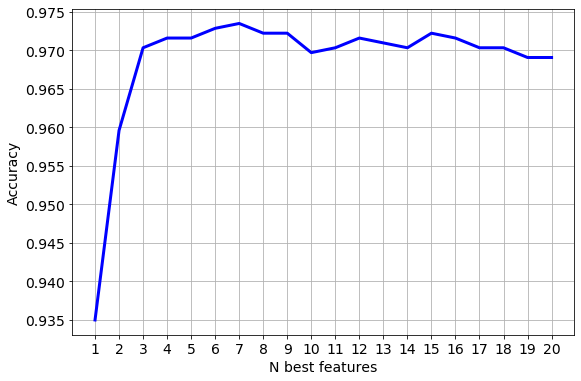

In [115]:
n_best_features = np.arange(1, 21)
n_best_names = feature_names # You need to find the correct order
# n_best_accuracies = np.random.rand(20) # You need to calculate these accuracies

plt.figure(figsize=(9, 6))
plt.plot(n_best_features, n_best_accuracies, color='b', linewidth=3)
plt.xticks(n_best_features, size=14)
plt.xlabel("N best features", size=14)
plt.yticks(size=14)
plt.ylabel("Accuracy", size=14)
plt.grid(b=1)
plt.show()

In [116]:
report = pd.DataFrame()
report['Name'] = feature_names[best_features]
report['Accuracy'] = n_best_accuracies
report

,Name,Accuracy
0,meanfun,0.934975
1,Q75,0.959596
2,IQR,0.970328
3,sp.ent,0.971591
4,minfun,0.971591
5,mode,0.972854
6,kurt,0.973485
7,skew,0.972222
8,maxfun,0.972222
9,mindom,0.969697


In [110]:
assert list(report['Name'] == ['meanfun', 'Q75', 'IQR', 'sp.ent', 'minfun', 'mode', 'kurt', 'skew', 'maxfun', 'mindom', 'Q25', 'meanfreq', 'sd', 'sfm', 'median', 'centroid', 'maxdom', 'meandom', 'dfrange', 'modindx'])

# Task 4 (2 points)

Well, now let's use PCA. Plot the dependency of the classification accuracy from the number of components of PCA. Vary the number of components from 1 to 20. Do you have the same accuracies for one PCA component and for the first best feature from Task 1? How do you explain it?

In this task you can use PCA from seminar or PCA from sklearn

The output example:

In [111]:
from sklearn.decomposition import PCA

pca_accuracies = []
for i in range(1, 21):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_transformed = pca.transform(X_train)
    X_transformed_test = pca.transform(X_test)
    clf.fit(X_transformed, y_train)
    predictions = clf.predict(X_transformed_test)
    pca_accuracies.append(accuracy_score(y_test, predictions))

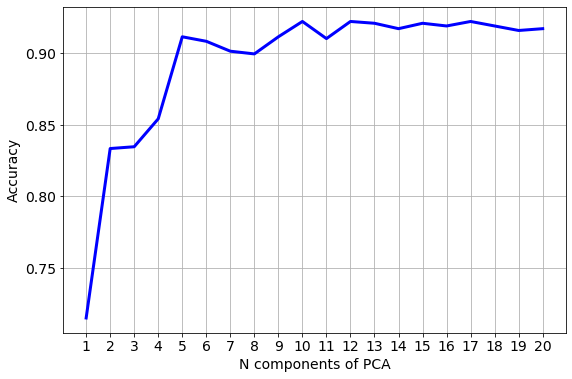

In [112]:
pca_components = np.arange(1, 21)
# pca_accuracies = np.random.rand(20) # You need to calculate these accuracies

plt.figure(figsize=(9, 6))
plt.plot(pca_components, pca_accuracies, color='b', linewidth=3)
plt.xticks(pca_components, size=14)
plt.xlabel("N components of PCA", size=14)
plt.yticks(size=14)
plt.ylabel("Accuracy", size=14)
plt.grid(b=1)
plt.show()

# Task 5 (1 point)

Plot explained variance and cumulative explained variance for the PCA at every number of components.

In [63]:
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [66]:
explained_variance = pca.explained_variance_
cumsum_explained_variance = np.cumsum(explained_variance)
pca_components = np.arange(1, 21)

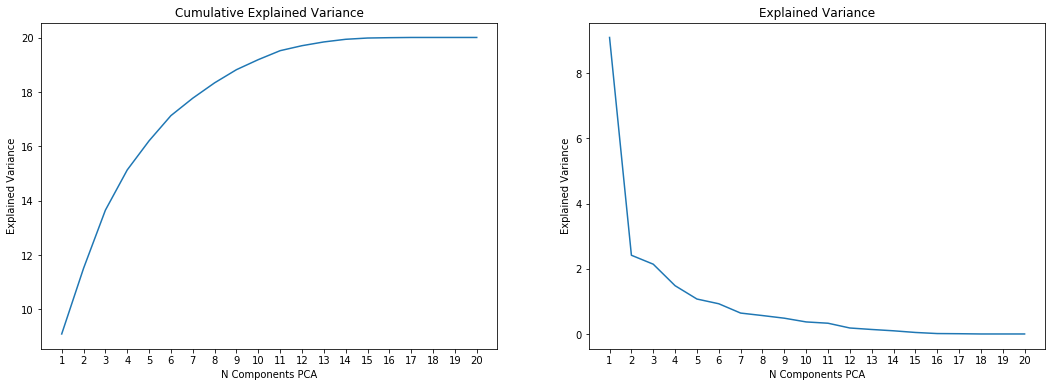

In [80]:
plt.figure(figsize=(18, 6))
pca_components = np.arange(1, 21)

plt.subplot(1, 2, 1)
plt.plot(pca_components, cumsum_explained_variance)
plt.xticks(pca_components)
plt.xlabel("N Components PCA")
plt.ylabel("Explained Variance")
plt.title("Cumulative Explained Variance")

plt.subplot(1, 2, 2)
plt.plot(pca_components, explained_variance)
plt.xticks(pca_components)
plt.xlabel("N Components PCA")
plt.title("Explained Variance")
plt.ylabel("Explained Variance")

plt.show()